In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import keract

import numpy as np

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.2637 - accuracy: 0.9183 - val_loss: 0.0840 - val_accuracy: 0.9742
Epoch 2/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0866 - accuracy: 0.9750 - val_loss: 0.0441 - val_accuracy: 0.9856
Epoch 3/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 4/12
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0309 - val_accuracy: 0.9893
Epoch 5/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0320 - val_accuracy: 0.9884
Epoch 6/12
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0285 - val_accuracy: 0.9904
Epoch 7/12
60000/60000 [==============================] - 115s

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029802003019871334
Test accuracy: 0.9911999702453613


In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

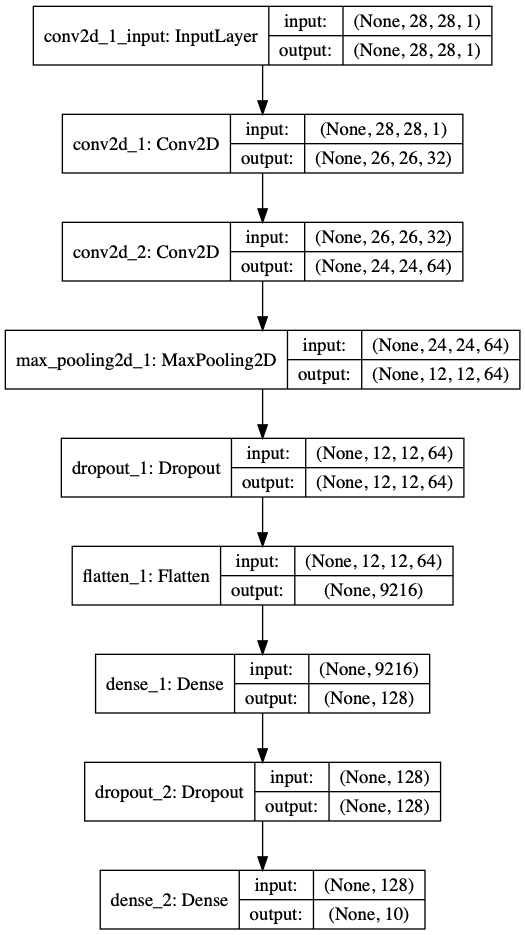

In [11]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

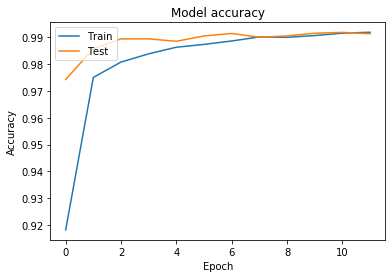

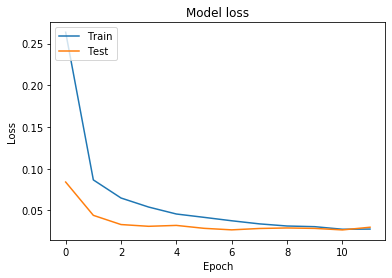

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

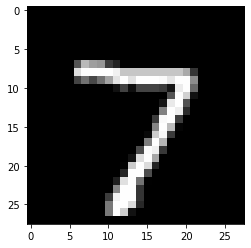

In [13]:
plt.imshow(np.squeeze(x_test[0:1]), interpolation='None', cmap='gray')

In [14]:
a = keract.get_activations(model, x_test[0:1])  # with just one sample.
keract.display_activations(a, directory='./activations/', save=True)

conv2d_1 (1, 26, 26, 32) 
conv2d_2 (1, 24, 24, 64) 
max_pooling2d_1 (1, 12, 12, 64) 
dropout_1 (1, 12, 12, 64) 
flatten_1 (1, 9216) 
dense_1 (1, 128) 
dropout_2 (1, 128) 
dense_2 (1, 10) 


In [15]:
# from keras import models
# import numpy as np

In [16]:
# img_tensor = []
# img_tensor.append(x_test[0])
# img_tensor = np.asarray(img_tensor, dtype=np.float32)
# plt.imshow(img_tensor[0].reshape(28, 28), cmap='gray_r')
# plt.show()

In [17]:
# layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
# activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

# activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

# first_layer_activation = activations[0]
# print(first_layer_activation.shape)

# plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# layer_names = []
# for layer in model.layers[:12]:
#     layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
# images_per_row = 16

# for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
#     n_features = layer_activation.shape[-1] # Number of features in the feature map
#     size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
#     n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
#     display_grid = np.zeros((size * n_cols, images_per_row * size))
#     for col in range(n_cols): # Tiles each filter into a big horizontal grid
#         for row in range(images_per_row):
#             channel_image = layer_activation[0, :, :, col * images_per_row + row]
#             channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
#             channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#             display_grid[col * size : (col + 1) * size, # Displays the grid
#                          row * size : (row + 1) * size] = channel_image
#     scale = 1. / size
#     plt.figure(figsize=(scale * display_grid.shape[1],
#                         scale * display_grid.shape[0]))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')